In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csvList = ['BDT_cv_results_1000.csv','BDT_cv_results_50.csv']

In [4]:
dfList = []

for csvFile in csvList:
    dfList.append(pd.read_csv(csvFile))

dfList

[     mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
 0       226.229918      1.830580         0.774533        0.004358   
 1       298.500991      2.478069         0.780355        0.002986   
 2       395.390282      1.915170         0.747245        0.004805   
 3       551.139926      3.687109         0.752132        0.003622   
 4       567.968875      1.856511         0.737456        0.002027   
 ..             ...           ...              ...             ...   
 103    1226.128393      3.313592         4.003448        0.016206   
 104    1313.820362     48.514361         3.445926        0.246122   
 105    1874.191132      2.970160         3.639131        0.006095   
 106    1815.462349      4.912615         3.329417        0.128515   
 107    2552.014244     63.849848         3.304876        0.058977   
 
      param_learning_rate  param_max_depth  param_max_features  \
 0                   0.05                4                   3   
 1                   0.05 

In [5]:
cv_results = pd.concat(dfList, ignore_index=True)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,226.229918,1.830580,0.774533,0.004358,0.05,4,3,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986105,0.001075,71,0.990231,0.990535,0.990323,0.990406,0.990895,0.990478,2.311162e-04
1,298.500991,2.478069,0.780355,0.002986,0.05,4,3,1000,1.0,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.985962,0.000696,75,0.990383,0.990501,0.990422,0.990670,0.990889,0.990573,1.861632e-04
2,395.390282,1.915170,0.747245,0.004805,0.05,4,6,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986274,0.000958,69,0.991333,0.991075,0.991387,0.991508,0.991562,0.991373,1.701271e-04
3,551.139926,3.687109,0.752132,0.003622,0.05,4,6,1000,1.0,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986597,0.001068,64,0.991314,0.991314,0.991326,0.991433,0.991450,0.991368,6.083522e-05
4,567.968875,1.856511,0.737456,0.002027,0.05,4,9,1000,0.7,"{'learning_rate': 0.05, 'max_depth': 4, 'max_f...",...,0.986380,0.001335,67,0.991533,0.991836,0.991800,0.992179,0.992039,0.991878,2.206998e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,67.361164,0.700409,0.229974,0.002101,0.20,14,3,50,1.0,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.985585,0.000760,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.184176e-10
212,71.681993,0.593467,0.202538,0.001704,0.20,14,6,50,0.7,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.984687,0.000997,23,0.999420,1.000000,1.000000,0.999827,1.000000,0.999849,2.250518e-04
213,98.684002,0.559091,0.217529,0.003336,0.20,14,6,50,1.0,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.985321,0.000822,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.930137e-17
214,94.737093,0.719408,0.196679,0.002618,0.20,14,9,50,0.7,"{'learning_rate': 0.2, 'max_depth': 14, 'max_f...",...,0.984989,0.001027,14,1.000000,1.000000,1.000000,1.000000,0.999682,0.999936,1.272179e-04


In [7]:
list(cv_results)

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_learning_rate',
 'param_max_depth',
 'param_max_features',
 'param_n_estimators',
 'param_subsample',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score',
 'split0_train_score',
 'split1_train_score',
 'split2_train_score',
 'split3_train_score',
 'split4_train_score',
 'mean_train_score',
 'std_train_score']

In [8]:
def transform_cv_results(cv_results, params, nsplits=5):
    test_scores = cv_results.loc[:, params + [f'split{i}_test_score' for i in range(nsplits)]]
    test_scores.set_index(params, inplace=True)
    test_scores.rename({f'split{i}_test_score' : i for i in range(nsplits)}, inplace=True, axis='columns')
    test_scores = pd.DataFrame(test_scores.stack()).rename({0 : 'score'}, axis='columns')
    test_scores['dataset'] = 'test'
    test_scores.set_index('dataset', inplace=True, append=True)
    test_scores.index.set_names(names='split', level=len(params), inplace=True)

    train_scores = cv_results.loc[:, params + [f'split{i}_train_score' for i in range(nsplits)]]
    train_scores.set_index(params, drop=True, inplace=True)
    train_scores.rename({f'split{i}_train_score' : i for i in range(nsplits)}, inplace=True, axis='columns')
    train_scores = pd.DataFrame(train_scores.stack()).rename({0 : 'score'}, axis='columns')
    train_scores['dataset'] = 'train'
    train_scores.set_index('dataset', inplace=True, append=True)
    train_scores.index.set_names(names='split', level=len(params), inplace=True)

    return pd.concat([test_scores, train_scores]).reset_index()

In [9]:
cv_results['diff_score'] = cv_results['mean_train_score'] - cv_results['mean_test_score']

In [10]:
parameters = {'max_depth'        : list(range(4, 15, 2)),
              'max_features'     : [3, 6, 9],
              'learning_rate'    : [0.05, 0.1, 0.2],
              'subsample'        : [0.7, 1.0],
              'n_estimators'     : [50, 1000]
} #50, 200, 500

In [11]:
cv_results_scores = transform_cv_results(cv_results, [f'param_{name}' for name in parameters.keys()])

In [12]:
cv_results_scores.set_index([f'param_{name}' for name in parameters.keys()] + ['split', 'dataset'], inplace=True)

In [13]:
cv_results_scores_train = cv_results_scores.loc[cv_results_scores.index.get_level_values('dataset')=='train', :].droplevel('dataset', axis='rows')
cv_results_scores_test = cv_results_scores.loc[cv_results_scores.index.get_level_values('dataset')=='test', :].droplevel('dataset', axis='rows')
cv_results_scores_diff = (cv_results_scores_train - cv_results_scores_test)

In [14]:
cv_results_scores['score difference'] = cv_results_scores_diff['score']

In [15]:
cv_results_scores.reset_index(inplace=True)
cv_results_scores.rename({'param_max_depth' : 'max depth', 
                          'param_max_features' : 'max features per split node',
                          'param_learning_rate' : 'learning rate',
                          'param_subsample' : 'sub sample per split node',
                          'param_n_estimators' : '# of trees'
}, inplace=True, axis='columns')

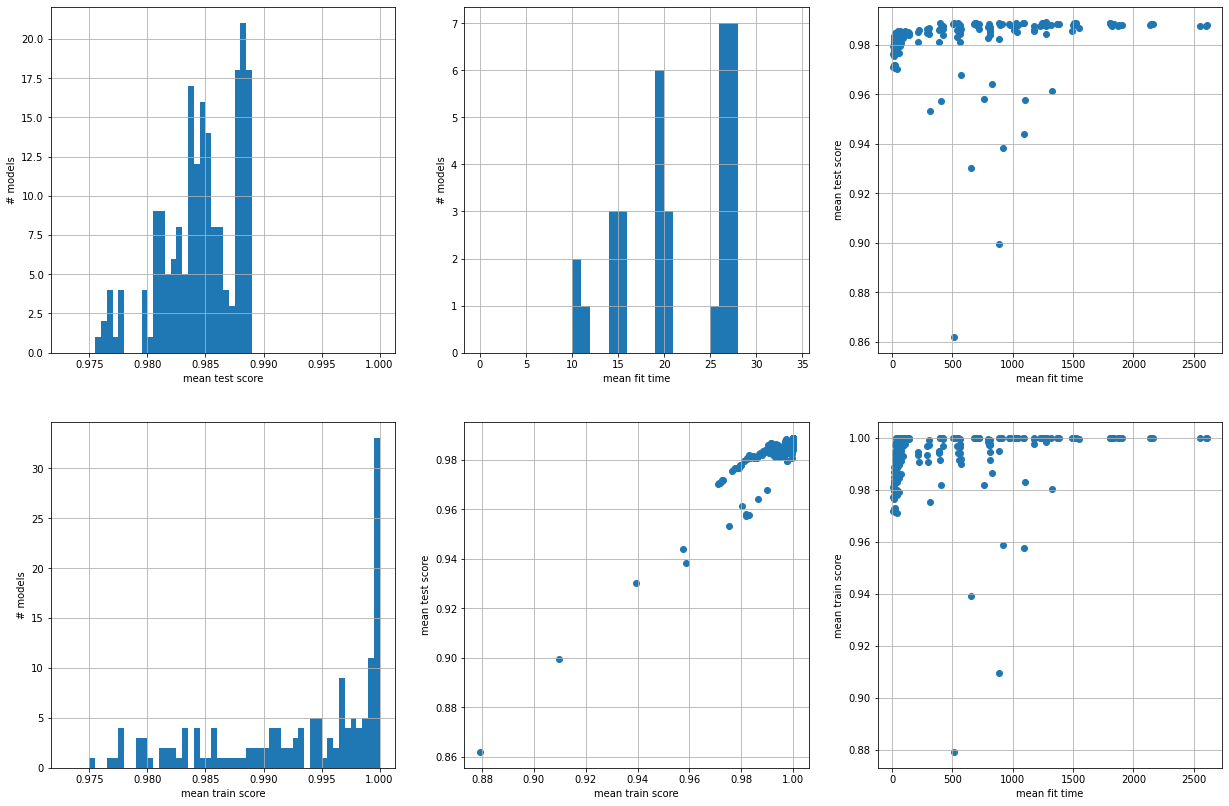

In [22]:
plt.figure(figsize=(21,14))

score_bins = np.arange(0.973, 1, 0.0005)
time_bins = np.arange(0, 35, 1)

plt.subplot(2, 3, 1)
plt.hist(cv_results['mean_test_score'], bins=score_bins)
plt.xlabel("mean test score")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 2)
plt.hist(cv_results['mean_fit_time'], bins=time_bins)
plt.xlabel("mean fit time")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 3)
plt.scatter(cv_results['mean_fit_time'], cv_results['mean_test_score'])
plt.xlabel("mean fit time")
plt.ylabel("mean test score")
plt.grid()

plt.subplot(2, 3, 4)
plt.hist(cv_results['mean_train_score'], bins=score_bins)
plt.xlabel("mean train score")
plt.ylabel("# models")
plt.grid()

plt.subplot(2, 3, 5)
plt.scatter(cv_results['mean_train_score'], cv_results['mean_test_score'])
plt.xlabel("mean train score")
plt.ylabel("mean test score")
plt.grid()

plt.subplot(2, 3, 6)
plt.scatter(cv_results['mean_fit_time'], cv_results['mean_train_score'])
plt.xlabel("mean fit time")
plt.ylabel("mean train score")
plt.grid()

plt.show()

In [17]:
cv_results.loc[cv_results['mean_test_score'] > 0.985, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('diff_score')

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
0,0.986105,0.001075,0.990478,226.229918,0.004373,0.05,4,3,1000,0.7
1,0.985962,0.000696,0.990573,298.500991,0.004611,0.05,4,3,1000,1.0
3,0.986597,0.001068,0.991368,551.139926,0.004771,0.05,4,6,1000,1.0
5,0.986616,0.000859,0.991491,807.641172,0.004875,0.05,4,9,1000,1.0
2,0.986274,0.000958,0.991373,395.390282,0.005099,0.05,4,6,1000,0.7
...,...,...,...,...,...,...,...,...,...,...
83,0.985342,0.002238,1.000000,1175.974631,0.014658,0.20,6,9,1000,1.0
213,0.985321,0.000822,1.000000,98.684002,0.014679,0.20,14,6,50,1.0
215,0.985280,0.000909,1.000000,131.733195,0.014720,0.20,14,9,50,1.0
175,0.985150,0.001051,0.999965,72.397692,0.014815,0.10,14,3,50,1.0


In [18]:
cv_results.loc[cv_results['mean_test_score'] > 0.9855, ['mean_test_score', 'std_test_score', 'mean_train_score', 'mean_fit_time', 'diff_score', 'param_learning_rate', 'param_max_depth', 'param_max_features', 'param_n_estimators', 'param_subsample']].sort_values('mean_fit_time')

,mean_test_score,std_test_score,mean_train_score,mean_fit_time,diff_score,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample
211,0.985585,0.000760,1.000000,67.361164,0.014415,0.20,14,3,50,1.0
0,0.986105,0.001075,0.990478,226.229918,0.004373,0.05,4,3,1000,0.7
37,0.986405,0.001106,0.993479,291.221873,0.007074,0.10,4,3,1000,1.0
1,0.985962,0.000696,0.990573,298.500991,0.004611,0.05,4,3,1000,1.0
6,0.986625,0.000934,0.996998,308.714822,0.010373,0.05,6,3,1000,0.7
...,...,...,...,...,...,...,...,...,...,...
65,0.988165,0.000946,1.000000,2147.792261,0.011835,0.10,12,9,1000,1.0
29,0.988323,0.000899,1.000000,2158.463967,0.011677,0.05,12,9,1000,1.0
107,0.987668,0.000880,1.000000,2552.014244,0.012332,0.20,14,9,1000,1.0
71,0.987700,0.000944,1.000000,2601.767208,0.012300,0.10,14,9,1000,1.0
